In [29]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GRU, LSTM, Dense
from tensorflow.keras.preprocessing import sequence

In [58]:
def create(model_name):
    m_name=eval(model_name)
    model=Sequential([
        Embedding(max_words, 64, input_length=max_length),
        m_name(64),Dense(1, activation='sigmoid')],name=model_name)
    return model

In [79]:
def m_compile(model,xtr,ytr):
    size=256
    e=4
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(xtr, ytr, batch_size=size, epochs=e, validation_split=0.2)  
    return history

In [71]:
max_words = 10000
(xtr,ytr),(xt, yt) = imdb.load_data(num_words=max_words)
max_length = 250
xtr = sequence.pad_sequences(xtr, maxlen=max_length)
xt = sequence.pad_sequences(xt, maxlen=max_length)

In [77]:
names=['SimpleRNN','GRU','LSTM']
models=[]
for i in names:
    m=create(i)
    models.append(m)

In [80]:
hist=[]
for i in models:
    x=m_compile(i,xtr,ytr)
    hist.append(x)

Epoch 1/4
79/79 [==============================] - 22s 253ms/step - loss: 0.6737 - accuracy: 0.5691 - val_loss: 0.7295 - val_accuracy: 0.5640
Epoch 2/4
79/79 [==============================] - 19s 243ms/step - loss: 0.5573 - accuracy: 0.7477 - val_loss: 0.5732 - val_accuracy: 0.6894
Epoch 3/4
79/79 [==============================] - 19s 242ms/step - loss: 0.2904 - accuracy: 0.8878 - val_loss: 0.4150 - val_accuracy: 0.8280
Epoch 4/4
79/79 [==============================] - 17s 220ms/step - loss: 0.0985 - accuracy: 0.9728 - val_loss: 0.4997 - val_accuracy: 0.7930
Epoch 1/4
79/79 [==============================] - 70s 847ms/step - loss: 0.5462 - accuracy: 0.7009 - val_loss: 0.3467 - val_accuracy: 0.8500
Epoch 2/4
79/79 [==============================] - 67s 849ms/step - loss: 0.2710 - accuracy: 0.8902 - val_loss: 0.3054 - val_accuracy: 0.8778
Epoch 3/4
79/79 [==============================] - 65s 825ms/step - loss: 0.1946 - accuracy: 0.9287 - val_loss: 0.3284 - val_accuracy: 0.8740
Epoch 

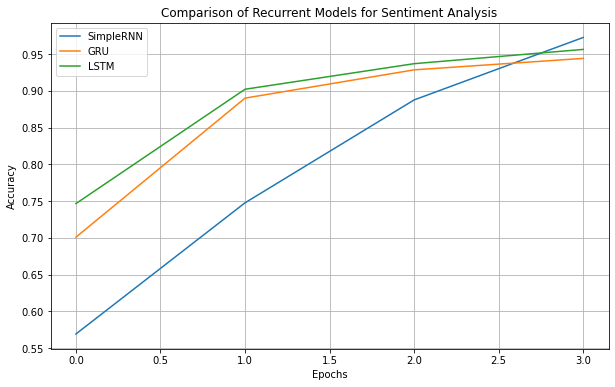

In [83]:
plt.figure(figsize=(10, 6))
for i, history in enumerate(hist):
    plt.plot(history.history['accuracy'], label=names[i])

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Comparison of Recurrent Models for Sentiment Analysis')
plt.legend()
plt.grid(True)
plt.show()